# On the Fundamental Resonant Mode of Inhomogeneous Soild Deposits

This notebook details the calculations and the generation of results in "On the fundamental resonant mode of inhomogeneous soil deposits". The authors recommend using this notebook as the paper is being read. The references to equations and figures correspond to those in the text.

_Joaquin Garcia-Suarez, 2019 (All rights reserved)_

## Import python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sympy as sym
import mpmath as mp
import cmath
import itertools
import array as arr
from scipy import special
from scipy.special import jv as besselJ
from scipy.special import yv as besselY
from scipy.optimize import fsolve
from math import pi as Pi
from cmath import sqrt as sqrt

Use inline magic to display plots on notebook

In [2]:
%matplotlib inline

## Auxiliary Parameters

Parameters necessary to evaluate the exact response corresponding the "generalized-parabola distribution" (Mylonakis et. al 2013):

In [3]:
def beta(alpha):
    return alpha**0.5

In [4]:
def b(alpha,n):
    return beta(alpha)**(1/n)

In [5]:
def q(alpha,n):
    return 1.0-b(alpha,n)

In [6]:
def psi(n):
    return (1-2*n)/2

In [7]:
def ell(n):
    return 2(1-n)

In [8]:
def nu(n):
    return (2*n-1)/2/(1-n)

In [9]:
def lambd(alpha,n,r,delta):
    auxval=r/sqrt(1+1j*delta)/(1-n)/(1-b(alpha,n))
    return auxval

Shear-wave velocity distribution ("generalized parabola"), eq.(3) in the text:

In [10]:
def f(eta,n,alpha):
    return (1+(beta(alpha)**(1/n)-1)*eta)**n

## Previous and new results used in the paper (for generalized parabola distribution)

### Exact solutions for generalized parabola (Rovithis et al. 2011)

Base-to-top transfer function, eq.(7):

In [11]:
def TFR(alpha,n,r,delta):
    aux_value=2/Pi*(b(alpha,n)**(psi(n)-1+n))/lambd(alpha,n,r,delta)*\
    (besselJ(nu(n)+1,lambd(alpha,n,r,delta)*b(alpha,n)**(1-n))*\
    besselY(nu(n),lambd(alpha,n,r,delta))-\
    besselY(nu(n)+1,lambd(alpha,n,r,delta)*b(alpha,n)**(1-n))*\
    besselJ(nu(n),lambd(alpha,n,r,delta)))**(-1)
    return aux_value

Function to find the exact fundamental frequency

In [12]:
def findR(alpha,n):
    aux_val=lambda r: abs(besselJ(nu(n)+1,lambd(alpha,n,r,0)*b(alpha,n)**(1-n))*\
    besselY(nu(n),lambd(alpha,n,r,0))-\
    besselY(nu(n)+1,lambd(alpha,n,r,0)*b(alpha,n)**(1-n))*\
    besselJ(nu(n),lambd(alpha,n,r,0)))
    return float(fsolve(aux_val,1))

Vertical displacement evolution across stratum, eq(5):

In [13]:
def Uexact(alpha,n,r,delta,eta):
    aux_value=((b(alpha,n)+q(alpha,n)*(1-eta))**psi(n))*\
    (besselJ(nu(n)+1,lambd(alpha,n,r,delta)*b(alpha,n)**(1-n))*\
    besselY(nu(n),lambd(alpha,n,r,delta)*(b(alpha,n)+q(alpha,n)*(1-eta))**(1-n))-\
    besselY(nu(n)+1,lambd(alpha,n,r,delta)*b(alpha,n)**(1-n))*\
    besselJ(nu(n),lambd(alpha,n,r,delta)*(b(alpha,n)+q(alpha,n)*(1-eta))**(1-n)))*\
    (besselJ(nu(n)+1,lambd(alpha,n,r,delta)*b(alpha,n)**(1-n))*\
    besselY(nu(n),lambd(alpha,n,r,delta))-\
    besselY(nu(n)+1,lambd(alpha,n,r,delta)*b(alpha,n)**(1-n))*\
    besselJ(nu(n),lambd(alpha,n,r,delta)))**(-1)
    return aux_value

### Estimate of the fundamental frequency applying Rayleigh Quotient (Mylonakis et al. 2011)

This function returns the value of the Rayleigh Quotient, eq.(4): 

In [14]:
def RayEst(alpha,n):
    aux_value2=(15/2*(-1-3*n-2*n**2+(1+2*n)*(3+2*n)*alpha**(1/2/n)-\
    (1+n)*(3+2*n)*alpha**(1/n)+alpha**(1+3/2/n))/(1+n)/(1+2*n)/(3+2*n)\
    /(-1+alpha**(1/2/n))**3)**(1/2)
    return aux_value2

### Results based on asymptotic behavior of exact solution (Garcia-Suarez, Seylabi and Asimaki, 2019)

Base-to-top transfer function, eq.(8):

In [15]:
def Asy_TR(alpha,n,r,delta):
    aux_value=(alpha**(-1/4))/np.cos((1-alpha**((1-n)/2/n))/(1-n)/(1-b(alpha,n))*r/sqrt(1+1j*DE))
    return aux_value

Corresponding value of fundamental frequency

In [16]:
def AsyEst(alpha,n):
    aux_value2=(1-n)*(1-beta(alpha)**(1/n))/(1-beta(alpha)**((1-n)/n))
    return aux_value2

### New results deriving from the resonance argument

Estimate of the displacement field, eq.(15): 

In [17]:
def Uest(alpha,n,r,delta,eta):
    auxV=1-(r**2)/delta*1j*((1-2*b(alpha,n)+2*n*(-1+b(alpha,n))+(-1+b(alpha,n)*\
    (2+2*n*(-1+eta)-eta)-2*n*(-1+eta)+eta)*(1+(b(alpha,n)-1)*eta)\
    **(1-2*n))/(2*(-1+n)*(-1+2*n)*(-1+b(alpha,n))**2))
    return auxV 

Dichotomy for displacement at resonance, eq.(18) (converted to total displacements):

In [18]:
def Uest2(delta):
    auxV=1-1/delta*1j
    return auxV 

The new estimate of the fundamental frequency based on the resonance argument, eq.(20b):

In [19]:
def IntegralEst(alpha,n):
    aux_value1=(Pi/8*(alpha-2*n*alpha+2*(-1+n)*alpha**(1+1/2/n)+alpha**(1/n))/\
               ((-1+n)*(-1+2*n)*alpha*(-1+b(alpha,n))**2))**(-1/2)
    return aux_value1

## Generate Figure 4 and 5: comparison of magnitude and phase of displacement field at resonance, assuming inhomogeneity given by gen. parabola
Fix the first set of values to input:

In [20]:
NN=0.1
BETA=0.1
DE=0.1
ALPHA=BETA**2
#find the corresponding frequency first
RR=findR(ALPHA,NN)

### Figure 4

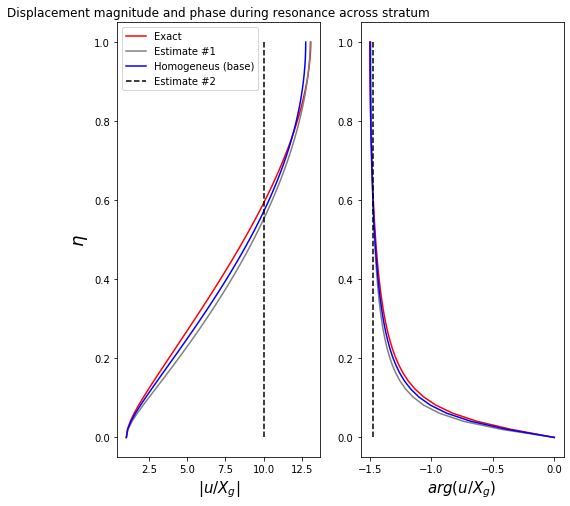

In [21]:
y=np.linspace(1,0)
plt.figure(figsize=(8,8))
plt.tight_layout()
plt.subplot(1,2,1)
plt.plot(abs(Uexact(ALPHA,NN,RR,DE,y)),y,'r',\
         abs(Uest(ALPHA,NN,RayEst(ALPHA,NN),DE,y)),y,'gray',\
         abs(np.cos(Pi/2/sqrt(1+1j*DE)*(1-y))/np.cos(Pi/2/sqrt(1+1j*DE))),y,'b',\
         abs(Uest2(DE))*np.ones(50),y,'k--');

plt.legend(('Exact', 'Estimate #1','Homogeneus (base)','Estimate #2'),
           loc='upper left')
plt.title('Displacement magnitude and phase during resonance across stratum')

plt.xlabel('$|u/X_g|$',fontsize=15);
plt.ylabel('$\eta$',fontsize=18);

plt.subplot(1,2,2)
plt.plot(np.angle(Uexact(ALPHA,NN,RR,DE,y)),y,'r',\
         np.angle(Uest(ALPHA,NN,RR,DE,y)),y,'gray',\
         np.angle(np.cos(Pi/2/sqrt(1+1j*DE)*(1-y))/np.cos(Pi/2/sqrt(1+1j*DE))),y,'b',\
         np.angle(Uest2(DE))*np.ones(50),y,'k--');

plt.xlabel('$arg(u/X_g)$',fontsize=15);

### Figure 5
New set of values

In [22]:
NN2=0.6
BETA2=0.3
ALPHA2=BETA2**2
#find the corresponding frequency
RR2=findR(ALPHA2,NN2)

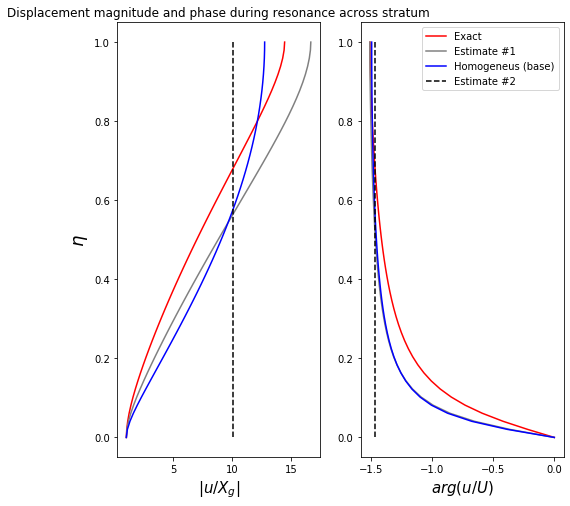

In [23]:
plt.figure(figsize=(8,8))
plt.tight_layout()
plt.subplot(1,2,1)
plt.title('Displacement magnitude and phase during resonance across stratum')
plt.plot(abs(Uexact(ALPHA2,NN2,RR2,DE,y)),y,'r',\
         abs(Uest(ALPHA2,RayEst(ALPHA2,NN2),RR2,DE,y)),y,'gray',\
         abs(np.cos(Pi/2/sqrt(1+1j*DE)*(1-y))/np.cos(Pi/2/sqrt(1+1j*DE))),y,'b',\
         abs(Uest2(DE))*np.ones(50),y,'k--');


plt.xlabel('$|u/X_g|$',fontsize=15);
plt.ylabel('$\eta$',fontsize=18);

plt.subplot(1,2,2)
plt.plot(np.angle(Uexact(ALPHA2,NN2,RR2,DE,y)),y,'r',\
         np.angle(Uest(ALPHA2,NN2,RayEst(ALPHA2,NN2),DE,y)),y,'gray',\
         np.angle(np.cos(Pi/2/sqrt(1+1j*DE)*(1-y))/np.cos(Pi/2/sqrt(1+1j*DE))),y,'b',\
         np.angle(Uest2(DE))*np.ones(50),y,'k--');

plt.xlabel('$arg(u/U)$',fontsize=15);
plt.legend(('Exact', 'Estimate #1','Homogeneus (base)','Estimate #2'),
           loc='upper right');

## Figure 6: Comparison of fundamental frequency of inhomoegenous stratum (generalized parabola)


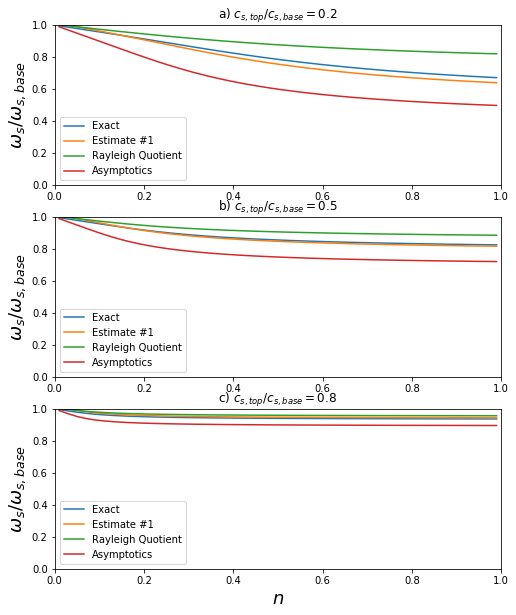

In [24]:
nn=np.linspace(0.01,0.99)
plotR=[]
for k in range(0,len(nn)):
    plotR.append(2/Pi*findR(0.2**2,nn[k]))
# Plot to compare against Mylonakis
plt.figure(figsize=(8,10))
plt.tight_layout()
plt.subplot(3,1,1)
# beta=0.2
plt.plot(nn,plotR,\
         nn,2/Pi*IntegralEst(0.2**2,nn),\
         nn,2/Pi*RayEst(0.2**2,nn),\
         nn,AsyEst(0.2**2,nn));
plt.axis([0, 1, 0, 1])

plt.legend(('Exact','Estimate #1','Rayleigh Quotient','Asymptotics'),
           loc='lower left')
plt.title('a) $c_{s,top} / c_{s,base}=0.2$')

plt.ylabel('$\omega_s/\omega_{s,base}$',fontsize=18);
# beta=0.5
plt.subplot(3,1,2)
plotR=[]
for k in range(0,len(nn)):
    plotR.append(2/Pi*findR(0.5**2,nn[k]))
plt.plot(nn,plotR,\
         nn,2/Pi*IntegralEst(0.5**2,nn),\
         nn,2/Pi*RayEst(0.5**2,nn),\
         nn,AsyEst(0.5**2,nn));
plt.axis([0, 1, 0, 1])

plt.legend(('Exact','Estimate #1','Rayleigh Quotient','Asymptotics'),
           loc='lower left')
plt.title('b) $c_{s,top} / c_{s,base}=0.5$')

plt.ylabel('$\omega_s/\omega_{s,base}$',fontsize=18);
# beta=0.8
plt.subplot(3,1,3)
plotR=[]
for k in range(0,len(nn)):
    plotR.append(2/Pi*findR(0.8**2,nn[k]))
plt.plot(nn,plotR,\
         nn,2/Pi*IntegralEst(0.8**2,nn),\
         nn,2/Pi*RayEst(0.8**2,nn),\
         nn,AsyEst(0.8**2,nn));
plt.axis([0, 1, 0, 1])

plt.legend(('Exact','Estimate #1','Rayleigh Quotient','Asymptotics'),
           loc='lower left')
plt.title('c) $c_{s,top} / c_{s,base}=0.8$')

plt.ylabel('$\omega_s/\omega_{s,base}$',fontsize=18);
plt.xlabel('$n$',fontsize=18);

## Generate Figure 7: amplification comparison assuming gen. parabola

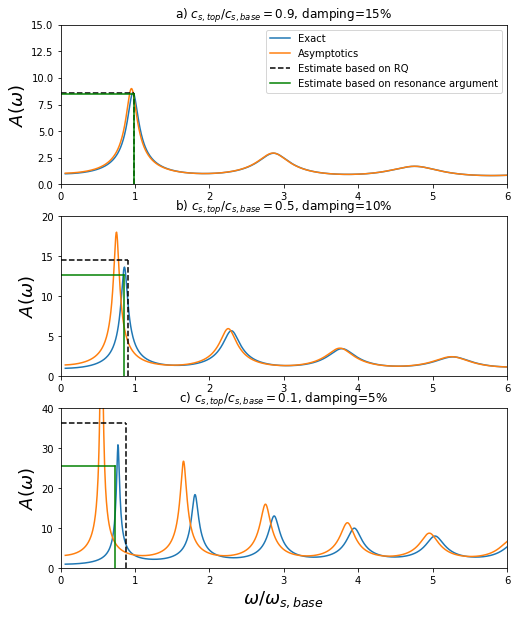

In [25]:
rr=np.linspace(0.1,6*Pi/2,1000)
DE=0.15
NN=0.499
BETA=0.9
ALPHA=BETA**2
# Plot to compare amplitude
plt.figure(figsize=(8,10))
plt.tight_layout()
# FIRST TILE
plt.subplot(3,1,1)
plt.title('a) $c_{s,top} / c_{s,base}=0.9$, damping=15%')
plt.plot(rr*2/Pi,abs(TFR(ALPHA,NN,rr,DE)));
plt.plot(rr*2/Pi,abs(Asy_TR(ALPHA,NN,rr,DE)));
# vertical lines
w_locus=RayEst(ALPHA,NN) # frequency
amplitude=abs(Uest(ALPHA,NN,RayEst(ALPHA,NN),DE,1))
plt.plot([w_locus/(Pi/2),w_locus/(Pi/2)],[0,amplitude],'k--')
plt.axis([0, 6, 0, 15])
w_locus2=IntegralEst(ALPHA,NN) # frequency
amplitude2=4/Pi/DE
plt.plot([w_locus2/(Pi/2),w_locus2/(Pi/2)],[0,amplitude2],'g')
plt.axis([0, 6, 0, 15])
# horizontal lines
plt.plot([0,w_locus/(Pi/2)],[amplitude,amplitude],'k--')
plt.plot([0,w_locus2/(Pi/2)],[amplitude2,amplitude2],'g')

plt.legend(('Exact','Asymptotics','Estimate based on RQ','Estimate based on resonance argument'),
           loc='upper right')

plt.ylabel('$A(\omega)$',fontsize=18);
# SECOND TILE
DE=0.10
BETA=0.5
ALPHA=BETA**2
plt.subplot(3,1,2)
plt.title('b) $c_{s,top} / c_{s,base}=0.5$, damping=10%')
plt.plot(rr*2/Pi,abs(TFR(ALPHA,NN,rr,DE)));
plt.plot(rr*2/Pi,abs(Asy_TR(ALPHA,NN,rr,DE)));
# vertical lines
w_locus=RayEst(ALPHA,NN) # frequency
amplitude=abs(Uest(ALPHA,NN,RayEst(ALPHA,NN),DE,1))
plt.plot([w_locus/(Pi/2),w_locus/(Pi/2)],[0,amplitude],'k--')
plt.axis([0, 6, 0, 15])
w_locus2=IntegralEst(ALPHA,NN) # frequency
amplitude2=4/Pi/DE
plt.plot([w_locus2/(Pi/2),w_locus2/(Pi/2)],[0,amplitude2],'g')
plt.axis([0, 6, 0, 20])
# horizontal lines
plt.plot([0,w_locus/(Pi/2)],[amplitude,amplitude],'k--')
plt.plot([0,w_locus2/(Pi/2)],[amplitude2,amplitude2],'g')

plt.ylabel('$A(\omega)$',fontsize=18);
# THIRD TILE
DE=0.05
BETA=0.1
ALPHA=BETA**2
plt.subplot(3,1,3)
plt.title('c) $c_{s,top} / c_{s,base}=0.1$, damping=5%')
plt.plot(rr*2/Pi,abs(TFR(ALPHA,NN,rr,DE)));
plt.plot(rr*2/Pi,abs(Asy_TR(ALPHA,NN,rr,DE)));
# vertical lines
w_locus=RayEst(ALPHA,NN) # frequency
amplitude=abs(Uest(ALPHA,NN,RayEst(ALPHA,NN),DE,1))
plt.plot([w_locus/(Pi/2),w_locus/(Pi/2)],[0,amplitude],'k--')
plt.axis([0, 6, 0, 15])
w_locus2=IntegralEst(ALPHA,NN) # frequency
amplitude2=4/Pi/DE
plt.plot([w_locus2/(Pi/2),w_locus2/(Pi/2)],[0,amplitude2],'g')
plt.axis([0, 6, 0, 40])
# horizontal lines
plt.plot([0,w_locus/(Pi/2)],[amplitude,amplitude],'k--')
plt.plot([0,w_locus2/(Pi/2)],[amplitude2,amplitude2],'g')

plt.ylabel('$A(\omega)$',fontsize=18);
plt.xlabel('$\omega/\omega_{s,base}$',fontsize=18);

## Generate Figure 8: amplification comparison layered site¶

### Function to calculate transfer function for discontinuous layers
This corresponds to an implementation of the classic procedure, which is detailed, e.g., in Kramer's(1996)

In [102]:
def getAmp(alpha_m,H,V_base,Vs,delta,hm):
    Amp=np.zeros(len(om))
    for vv in range(np.size(Amp)):
        L=np.array([[1, 0], [0, 1]])
        for uu in range(len(alpha_m)):
            hmkm=1j*Pi/2*hm[uu]/H*V_base/Vs[uu]*om[vv]*(1-1j*delta/2)
            Laux=np.array([[0.5*(1+alpha_m[uu])*cmath.exp(hmkm),\
            0.5*(1-alpha_m[uu])*cmath.exp(-hmkm)],\
            [0.5*(1-alpha_m[uu])*cmath.exp(hmkm),\
            0.5*(1+alpha_m[uu])*cmath.exp(-hmkm)]]) 
            L=np.dot(Laux,L) #the new matrix multiply the previous one from the left
        Amp[vv]=2/abs(L[0,0]+L[0,1]+L[1,0]+L[1,1])
    return Amp

### Function to calculate the integral estimate of the fundamental frequency for layered site

In [27]:
def getWn(ZZ,Vs,depth):
    # Discretize and normalize Vs into Vs_disc (same #points as ZZ)
    Vs_disc=np.linspace(0,1,1000)
    ii=0
    jj=0
    while ii < len(ZZ):
        # ZZ[ii] in what interval?
        if ZZ[ii]<=depth[jj]: # in the j-th interval
            Vs_disc[ii]=Vs[jj]
        else: # in the next one
            jj+=1
            Vs_disc[ii]=Vs[jj]
        ii+=1
    Vs_disc[-1]=Vs[-1]
    Vs_disc=np.flip(Vs_disc)/Vs[-1]
    # Calculate the weighted harmonic mean of the shear modulus
    C_cor=0
    for ii in range(1000):
        C_cor=C_cor+1/Vs_disc[-(ii+1)]/Vs_disc[-(ii+1)]\
        *ZZ[ii]/H*(ZZ[1]-ZZ[0])/H
    return abs(sqrt(16.0/C_cor/Pi**3))

Range of frequencies to be used for plots (expressed as multiples of the fundamental frequency of the homogeneous stratum based on the properties at the base)

In [28]:
om=np.linspace(0,6,1000)

### Quick Test (Homogeneous case)

Let us run an example divided in multiple layers with the same properties

In [103]:
DE=0.1
depth=arr.array('f',[20,190,410,518]) # [m]
Vs=arr.array('f',[110,110,110,110]) # Vs distribution [m/s]
#
H=depth[-1] # soft soil depth [m]
ZZ=np.linspace(0,H,1000) # [m]
YY=np.flip(1-ZZ/H) # profile distance from base to top [m]
V_base=Vs[-1] # Vs of the soil in contact with bedrock
# Inter-layer impedance
alpha_m=np.divide(Vs[0:len(Vs)-1],Vs[1:len(Vs)])
alpha_m=alpha_m.tolist()
alpha_m.append(0)
# Layer depth
hm=np.subtract(depth[1:len(depth)],depth[0:len(depth)-1])
hm=np.concatenate(([depth[0]],hm),axis=0)

In [93]:
AmpHom=np.zeros(len(om))
for vv in range(np.size(AmpHom)):
    AmpHom[vv]=abs(1/cmath.cos(Pi/2*om[vv]*(1-1j*DE/2)))

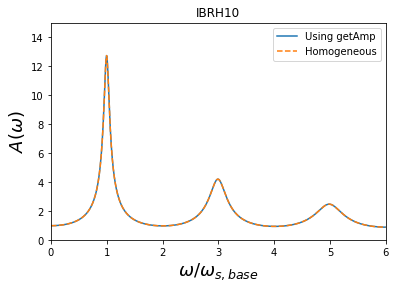

In [105]:
plt.plot(om,getAmp(alpha_m,H,V_base,Vs,DE,hm));
plt.axis([0, 6, 0, 15]);
plt.plot(om,AmpHom,'--')

plt.legend(('Using getAmp','Homogeneous'),
           loc='upper right')

plt.ylabel('$A(\omega)$',fontsize=18);
plt.xlabel('$\omega/\omega_{s,base}$',fontsize=18);
plt.title('IBRH10');

### KikNet Data: IBRH10

In [106]:
depth=arr.array('f',[20,190,410,518]) # [m]
Vs=arr.array('f',[110,380,530,850]) # Vs distribution [m/s]
#
H=depth[-1] # soft soil depth [m]
ZZ=np.linspace(0,H,1000) # [m]
YY=np.flip(1-ZZ/H) # profile distance from base to top [m]
V_base=Vs[-1] # Vs of the soil in contact with bedrock
# Inter-layer impedance
alpha_m=np.divide(Vs[0:len(Vs)-1],Vs[1:len(Vs)])
alpha_m=alpha_m.tolist()
alpha_m.append(0)
# Layer depth
hm=np.subtract(depth[1:len(depth)],depth[0:len(depth)-1])
hm=np.concatenate(([depth[0]],hm),axis=0)

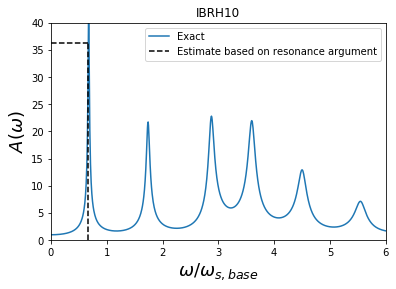

In [108]:
DE=0.035
plt.plot(om,getAmp(alpha_m,H,V_base,Vs,DE,hm));
plt.axis([0, 6, 0, 40]);
# vertical lines
w_locus=getWn(ZZ,Vs,depth) # frequency
amplitude=1+Pi*Pi/8/DE
plt.plot([w_locus,w_locus],[0,amplitude],'k--')
# horizontal lines
plt.plot([0,w_locus],[amplitude,amplitude],'k--')

plt.legend(('Exact','Estimate based on resonance argument'),
           loc='upper right')

plt.ylabel('$A(\omega)$',fontsize=18);
plt.xlabel('$\omega/\omega_{s,base}$',fontsize=18);
plt.title('IBRH10');

### KikNet Data: TKCH08

In [113]:
depth=arr.array('f',[4,36,78]) # [m]
Vs=arr.array('f',[130,480,590]) # Vs distribution [m/s]
#
H=depth[-1] # soft soil depth [m]
ZZ=np.linspace(0,H,1000) # [m]
YY=np.flip(1-ZZ/H) # profile distance from base to top [m]
V_base=Vs[-1] # Vs of the soil in contact with bedrock
# Inter-layer impedance
alpha_m=np.divide(Vs[0:len(Vs)-1],Vs[1:len(Vs)])
alpha_m=alpha_m.tolist()
alpha_m.append(0)
# Layer depth
hm=np.subtract(depth[1:len(depth)],depth[0:len(depth)-1])
hm=np.concatenate(([depth[0]],hm),axis=0)

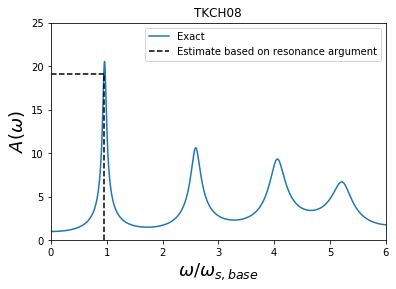

In [110]:
DE=0.068
plt.plot(om,getAmp(alpha_m,H,V_base,Vs,DE,hm));
plt.axis([0, 6, 0, 25]);
# vertical lines
w_locus=getWn(ZZ,Vs,depth) # frequency
amplitude=1+Pi*Pi/8/DE
plt.plot([w_locus,w_locus],[0,amplitude],'k--')
# horizontal lines
plt.plot([0,w_locus],[amplitude,amplitude],'k--')

plt.legend(('Exact','Estimate based on resonance argument'),
           loc='upper right')

plt.ylabel('$A(\omega)$',fontsize=18);
plt.xlabel('$\omega/\omega_{s,base}$',fontsize=18);
plt.title('TKCH08');

### KikNet Data: IBRH17

In [111]:
depth=arr.array('f',[1,10,90,235,300,380,460]) # [m]
Vs=arr.array('f',[90,250,380,470,540,660,820]) # Vs distribution [m/s]
#
H=depth[-1] # soft soil depth [m]
ZZ=np.linspace(0,H,1000) # [m]
YY=np.flip(1-ZZ/H) # profile distance from base to top [m]
V_base=Vs[-1] # Vs of the soil in contact with bedrock
# Inter-layer impedance
alpha_m=np.divide(Vs[0:len(Vs)-1],Vs[1:len(Vs)])
alpha_m=alpha_m.tolist()
alpha_m.append(0)
# Layer depth
hm=np.subtract(depth[1:len(depth)],depth[0:len(depth)-1])
hm=np.concatenate(([depth[0]],hm),axis=0)

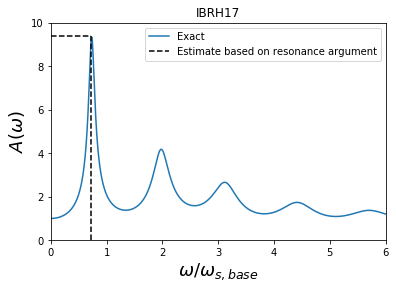

In [112]:
DE=0.147
plt.plot(om,getAmp(alpha_m,H,V_base,Vs,DE,hm));
plt.axis([0, 6, 0, 10]);
# vertical lines
w_locus=getWn(ZZ,Vs,depth) # frequency
amplitude=1+Pi*Pi/8/DE
plt.plot([w_locus,w_locus],[0,amplitude],'k--')
# horizontal lines
plt.plot([0,w_locus],[amplitude,amplitude],'k--')

plt.legend(('Exact','Estimate based on resonance argument'),
           loc='upper right')

plt.ylabel('$A(\omega)$',fontsize=18);
plt.xlabel('$\omega/\omega_{s,base}$',fontsize=18);
plt.title('IBRH17');